In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("url_dataset.csv")

df_legit = df[df['type'] == 'legitimate']

print(f"Số lượng dòng Legitimate sau khi lấy mẫu: {len(df_legit)}")

df_legit.to_csv("legitimate_sample.csv", index=False)

Số lượng dòng Legitimate sau khi lấy mẫu: 345738


In [ ]:
df = pd.read_csv("legitimate_sample.csv")

df = df.rename(columns={'type': 'label'})

df['label'] = df['label'].str.strip().str.lower()
df['label'] = df['label'].replace({'legitimate': 0}).astype(int)
df['label'] = df['label'].astype(int)

print(df['label'].value_counts())

df.to_csv("updated_dataset.csv", index=False)

<ipython-input-6-d835781b7ef2>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'legitimate': 0}).astype(int)


label
0    345738
Name: count, dtype: int64


In [ ]:
# Đọc dữ liệu từ 2 file
df_phishtank = pd.read_csv("phishtank_urls.csv")
df_openphish = pd.read_csv("openphish_urls.csv")

# Đổi tên cột 'URL' thành 'url'
df_openphish = df_openphish.rename(columns={'URL': 'url'})

# Hợp nhất 2 DataFrame
df_merged = pd.concat([df_phishtank, df_openphish], ignore_index=True)

# Kiểm tra URL trùng lặp
duplicate_urls = df_merged[df_merged.duplicated(subset='url')]
print(f"🌐 Số URL trùng lặp: {len(duplicate_urls)}")

# Xoá các URL trùng
df_merged = df_merged.drop_duplicates(subset='url')

# Xáo trộn ngẫu nhiên
df_merged = df_merged.sample(frac=1, random_state=42).reset_index(drop=True)

# Ghi vào file CSV
merged_file_path = "merged_urls.csv"
df_merged.to_csv(merged_file_path, index=False)

print(f"✅ File đã được lưu tại: {merged_file_path}")

🌐 Số URL trùng lặp: 3379
✅ File đã được lưu tại: merged_urls.csv


In [ ]:
import pandas as pd

df_dataset = pd.concat([df, df_merged], ignore_index=True)

df_dataset = df_dataset.drop_duplicates(subset=['url'])

# Lưu file dataset hoàn chỉnh
web_phishing_dataset = "web_phishing_dataset_1.csv"
df_dataset.to_csv(web_phishing_dataset, index=False)

print(f"File đã được lưu tại: {web_phishing_dataset}")

File đã được lưu tại: web_phishing_dataset_1.csv


In [ ]:
df = pd.read_csv('web_phishing_dataset_1.csv')

🔍 Thống kê cơ bản:
Label 0.0: 345738 mẫu (75.71%)
Label 1.0: 110946 mẫu (24.29%)


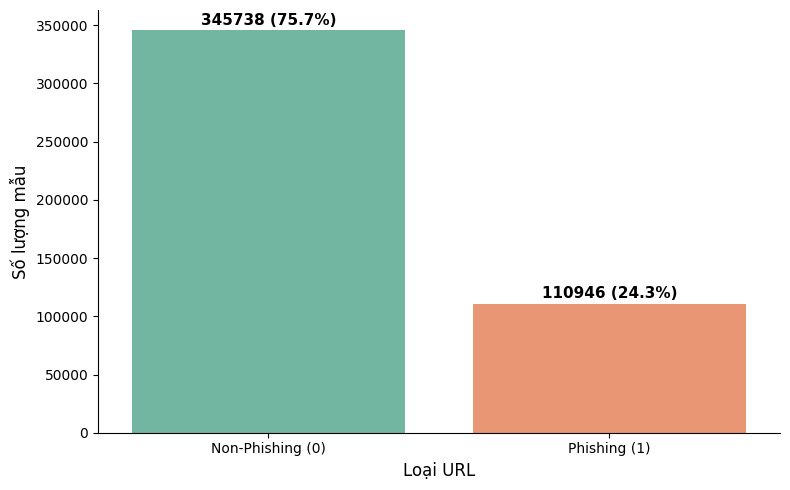

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Đếm số lượng từng nhãn
label_counts = df['label'].value_counts().sort_index()
total = label_counts.sum()

print("🔍 Thống kê cơ bản:")
for label, count in label_counts.items():
    percent = (count / total) * 100
    print(f"Label {label}: {count} mẫu ({percent:.2f}%)")

# Biểu đồ
plt.figure(figsize=(8,5))
ax = sns.countplot(x='label', hue='label', data=df, palette='Set2', legend=False)

# Gắn số lượng và phần trăm lên mỗi cột
for p, count in zip(ax.patches, label_counts):
    height = int(p.get_height())
    percent = (height / total) * 100
    ax.annotate(f'{height} ({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, height + total * 0.01),
                ha='center', fontsize=11, fontweight='bold')

# Đặt nhãn cho trục X
ax.set_xticklabels(['Non-Phishing (0)', 'Phishing (1)'])

# Tiêu đề và trục
plt.xlabel('Loại URL', fontsize=12)
plt.ylabel('Số lượng mẫu', fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
# Cân bằng dataset
df_benign = df[df['label'] == 0]
df_phishing = df[df['label'] == 1]

# Lấy mẫu benign bằng số lượng phishing
df_benign_under = df_benign.sample(n=len(df_phishing), random_state=42)

# Gộp lại
df_balanced = pd.concat([df_benign_under, df_phishing]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['label'].value_counts())

label
0.0    110946
1.0    110946
Name: count, dtype: int64


In [ ]:
web_phishing_dataset = "web_phishing_dataset_2.csv"
df_balanced.to_csv(web_phishing_dataset, index=False)

🔍 Thống kê cơ bản:
Label 0.0: 110946 mẫu (50.00%)
Label 1.0: 110946 mẫu (50.00%)


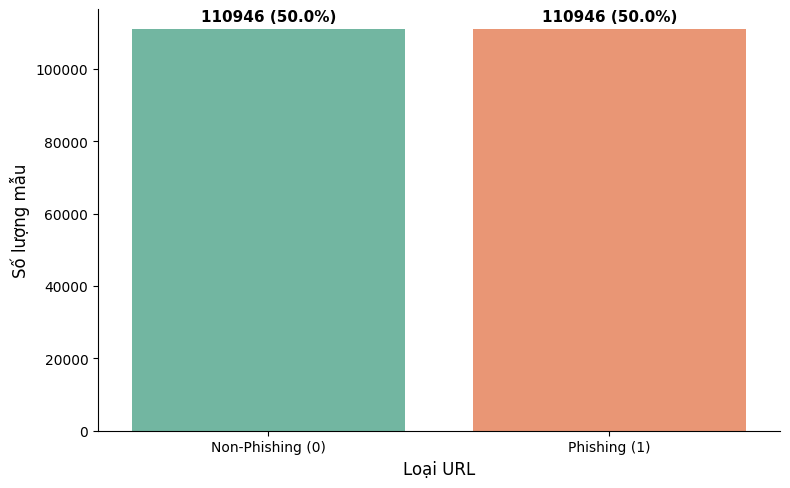

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt các cảnh báo không cần thiết
warnings.filterwarnings("ignore")

# Đếm số lượng từng nhãn
label_counts = df_balanced['label'].value_counts().sort_index()
total = label_counts.sum()

print("🔍 Thống kê cơ bản:")
for label, count in label_counts.items():
    percent = (count / total) * 100
    print(f"Label {label}: {count} mẫu ({percent:.2f}%)")

# Biểu đồ
plt.figure(figsize=(8,5))
ax = sns.countplot(x='label', hue='label', data=df_balanced, palette='Set2', legend=False)

# Gắn số lượng và phần trăm lên mỗi cột
for p, count in zip(ax.patches, label_counts):
    height = int(p.get_height())
    percent = (height / total) * 100
    ax.annotate(f'{height} ({percent:.1f}%)',
                (p.get_x() + p.get_width() / 2, height + total * 0.01),
                ha='center', fontsize=11, fontweight='bold')

# Đặt nhãn cho trục X
ax.set_xticklabels(['Non-Phishing (0)', 'Phishing (1)'])

# Tiêu đề và trục
plt.xlabel('Loại URL', fontsize=12)
plt.ylabel('Số lượng mẫu', fontsize=12)

# Xóa đường viền không cần thiết
sns.despine()

# Căn chỉnh cho gọn gàng
plt.tight_layout()
plt.show()


In [ ]:
import re
from urllib.parse import urlparse, parse_qs

def extract_features(url):
    parsed = urlparse(url)
    protocol = parsed.scheme
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query

    len_url = len(url)
    len_domain = len(domain)
    len_path = len(path)
    num_dots = domain.count('.')
    num_slashes = path.count('/')
    query_params = parse_qs(query)
    num_query_params = len(query_params)
    ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    has_ip = 1 if re.search(ip_pattern, domain) else 0
    is_https = 1 if protocol == 'https' else 0
    keywords = ['login', 'signin', 'account', 'secure', 'update', 'verify', 'bank', 'password', 'credit', 'card', 'confirm',
                'suspend', 'alert', 'service', 'access', 'identity', 'online', 'webscr', 'cmd', 'ebayisapi']
    has_keyword = 1 if any(keyword in url.lower() for keyword in keywords) else 0
    special_chars = ['-', '@', '%', '&', '=', '?', '_', '~']
    num_special_chars = sum(url.count(c) for c in special_chars)

    return {
        'len_url': len_url,
        'len_domain': len_domain,
        'len_path': len_path,
        'num_dots': num_dots,
        'num_slashes': num_slashes,
        'num_query_params': num_query_params,
        'has_ip': has_ip,
        'is_https': is_https,
        'has_keyword': has_keyword,
        'num_special_chars': num_special_chars
    }

In [ ]:
url = "https://colab.research.google.com/drive/1H6leO_bH-BCsX4kM7GkkUA5qEB5YI_13#scrollTo=eSw5fz72yLQ7"
features = extract_features(url)
for key, value in features.items():
    print(f"{key}: {value}")

len_url: 95
len_domain: 25
len_path: 40
num_dots: 3
num_slashes: 2
num_query_params: 0
has_ip: 0
is_https: 1
has_keyword: 0
num_special_chars: 4


In [ ]:
# Load and process the dataset
df = pd.read_csv('web_phishing_dataset_2.csv')
features = df['url'].apply(extract_features)
feature_names = ['len_url', 'len_domain', 'len_path', 'num_dots', 'num_slashes', 'num_query_params', 'has_ip', 'is_https', 'has_keyword', 'num_special_chars']
features_df = pd.DataFrame(list(features), columns=feature_names)

In [ ]:
features_df

,len_url,len_domain,len_path,num_dots,num_slashes,num_query_params,has_ip,is_https,has_keyword,num_special_chars
0,33,16,9,2,1,0,0,1,0,0
1,118,19,91,2,2,0,0,1,0,9
2,38,29,1,2,1,0,0,1,0,1
3,82,28,46,2,2,0,0,1,1,9
4,71,23,40,2,4,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
221887,39,31,1,2,1,0,0,0,0,3
221888,36,27,1,3,1,0,0,1,0,0
221889,77,29,40,2,1,0,0,1,0,4
221890,57,29,20,2,1,0,0,1,0,1


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
X = features_df
y = df['label']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
import time
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ẩn cảnh báo không quan trọng
warnings.filterwarnings('ignore')

def train_and_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n🔍 Training: {name}")
    start_time = time.time()

    model.fit(X_train, y_train)
    elapsed = time.time() - start_time

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"⏱️  Training Time: {elapsed:.2f} seconds")
    print(f"📊 Classification Report:\n{classification_report(y_test, y_pred)}")

    return {
        'model': model,
        'accuracy': acc,
        'time': elapsed
    }

# Huấn luyện từng model
dt_result = train_and_evaluate_model(
    "Decision Tree",
    DecisionTreeClassifier(random_state=42),
    X_train, y_train, X_test, y_test
)

rf_result = train_and_evaluate_model(
    "Random Forest",
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, y_train, X_test, y_test
)

xgb_result = train_and_evaluate_model(
    "XGBoost",
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    X_train, y_train, X_test, y_test
)

cat_result = train_and_evaluate_model(
    "CatBoost",
    CatBoostClassifier(verbose=0, random_state=42),
    X_train, y_train, X_test, y_test
)

# Lưu model từ kết quả
dt = dt_result['model']
rf = rf_result['model']
xgb = xgb_result['model']
cat = cat_result['model']


🔍 Training: Decision Tree
✅ Accuracy: 0.9167
⏱️  Training Time: 0.48 seconds
📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     44500
         1.0       0.91      0.92      0.92     44257

    accuracy                           0.92     88757
   macro avg       0.92      0.92      0.92     88757
weighted avg       0.92      0.92      0.92     88757


🔍 Training: Random Forest
✅ Accuracy: 0.9218
⏱️  Training Time: 13.30 seconds
📊 Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     44500
         1.0       0.92      0.92      0.92     44257

    accuracy                           0.92     88757
   macro avg       0.92      0.92      0.92     88757
weighted avg       0.92      0.92      0.92     88757


🔍 Training: XGBoost
✅ Accuracy: 0.9202
⏱️  Training Time: 2.33 seconds
📊 Classification Report:
              precision    recall  f1-scor

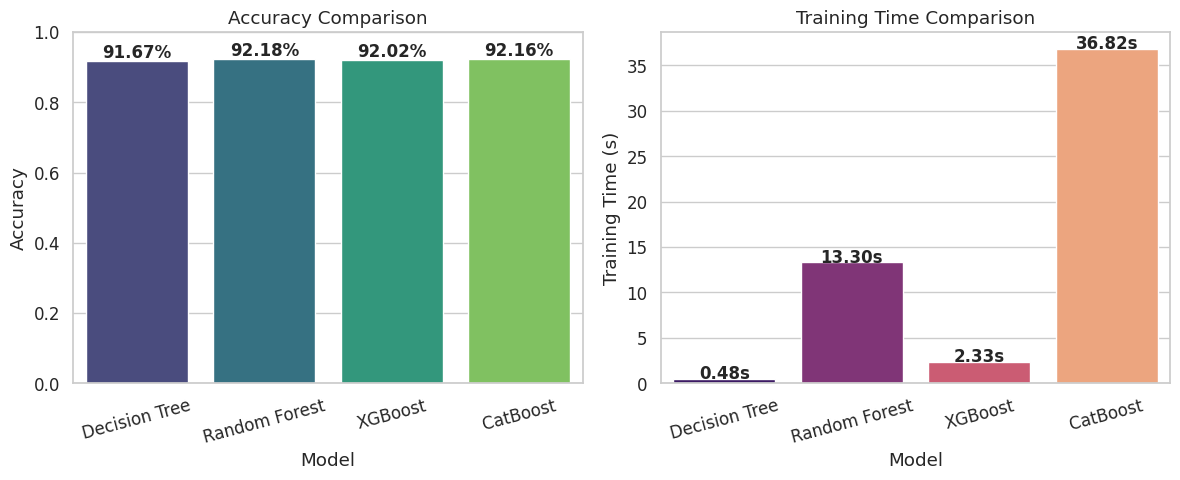

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame([
    {"Model": "Decision Tree", "Accuracy": dt_result["accuracy"], "Training Time (s)": dt_result["time"]},
    {"Model": "Random Forest", "Accuracy": rf_result["accuracy"], "Training Time (s)": rf_result["time"]},
    {"Model": "XGBoost", "Accuracy": xgb_result["accuracy"], "Training Time (s)": xgb_result["time"]},
    {"Model": "CatBoost", "Accuracy": cat_result["accuracy"], "Training Time (s)": cat_result["time"]}
])

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 5))

import warnings
warnings.filterwarnings("ignore")

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=comparison_df, x="Model", y="Accuracy", hue="Model", palette="viridis", legend=False)
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=15)

# Thêm giá trị Accuracy (%) lên trên các thanh
for p in ax1.patches:
    accuracy_value = p.get_height() * 100  # Đổi Accuracy thành %
    ax1.annotate(f'{accuracy_value:.2f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                 ha='center', fontsize=12, fontweight='bold')

# Biểu đồ Training Time
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=comparison_df, x="Model", y="Training Time (s)", hue="Model", palette="magma", legend=False)
plt.title("Training Time Comparison")
plt.xticks(rotation=15)

# Thêm giá trị Training Time lên trên các thanh
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}s',
                 (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                 ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

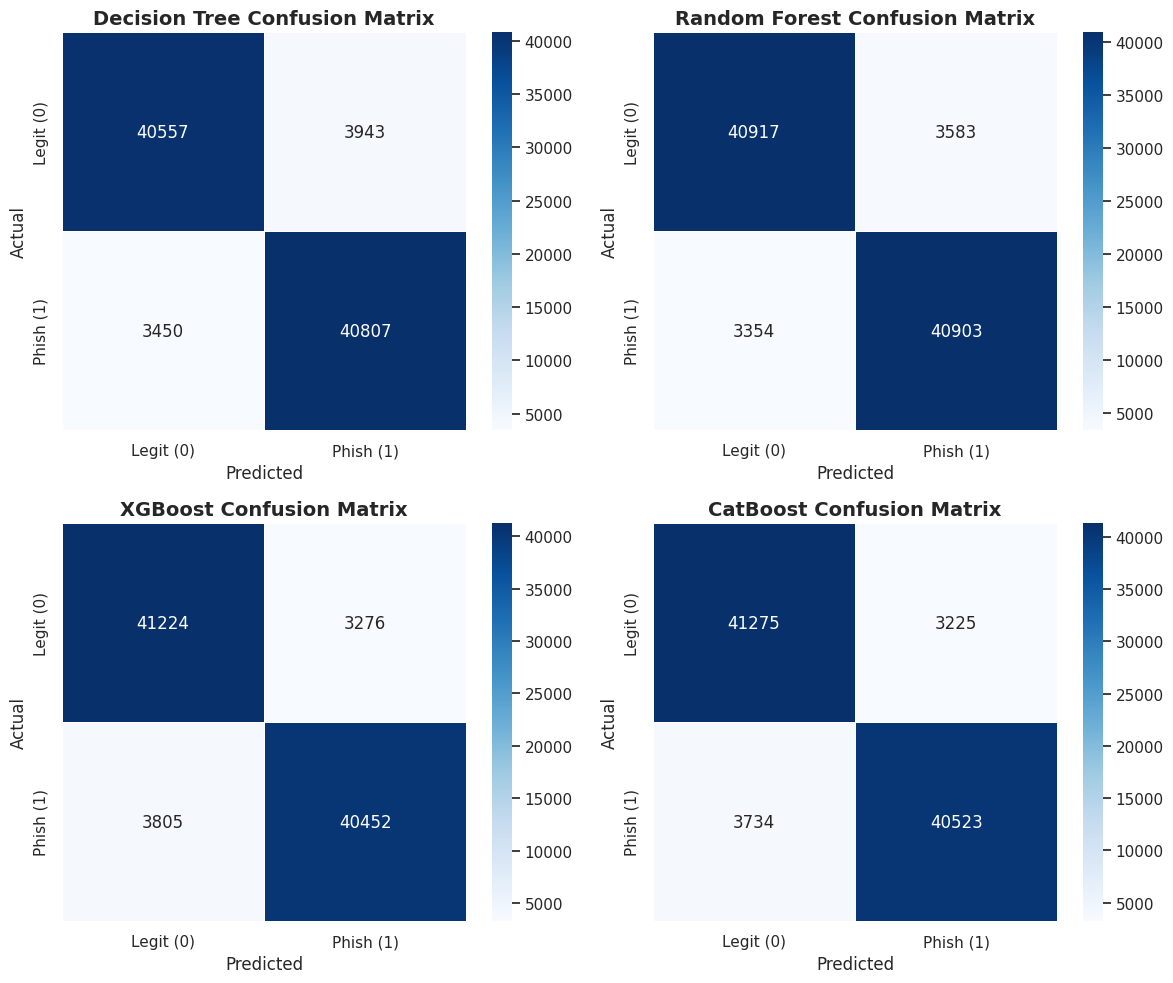

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Cài đặt theme cho seaborn
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.0)

# Danh sách các model và tên
models = [
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("XGBoost", xgb),
    ("CatBoost", cat)
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Giảm kích thước toàn bộ biểu đồ

for ax, (title, model) in zip(axes.flat, models):
    cm = confusion_matrix(y_test, model.predict(X_test))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Legit (0)', 'Phish (1)'],
                yticklabels=['Legit (0)', 'Phish (1)'],
                ax=ax, annot_kws={"size": 12}, linewidths=0.5)

    ax.set_title(f'{title} Confusion Matrix', fontsize=14, fontweight='bold')
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.grid(False)
    ax.set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

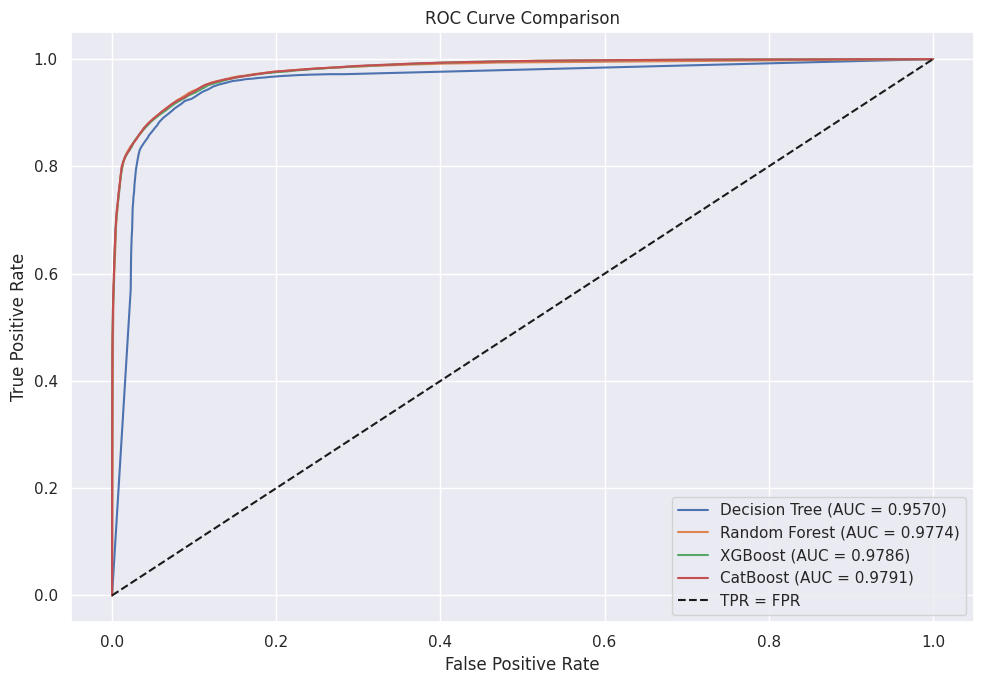

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dự đoán xác suất cho class 1 (phishing)
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
cat_probs = cat.predict_proba(X_test)[:, 1]

# Tính FPR, TPR và AUC
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
cat_fpr, cat_tpr, _ = roc_curve(y_test, cat_probs)

dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
cat_auc = auc(cat_fpr, cat_tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(10, 7))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.4f})')
plt.plot(cat_fpr, cat_tpr, label=f'CatBoost (AUC = {cat_auc:.4f})')

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'k--', label='TPR = FPR')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def predict_url(model, url, extract_features):
    # Trích xuất đặc trưng từ URL
    features = extract_features(url)

    # Nếu hàm extract trả về list -> convert sang DataFrame (1 hàng)
    if isinstance(features, list):
        features = pd.DataFrame([features])
    elif isinstance(features, dict):
        features = pd.DataFrame([features])

    # Dự đoán
    prediction = model.predict(features)[0]

    label = "🔴 Phishing" if prediction == 1 else "🟢 Legit"

    print(f"\n🔎 URL: {url}")
    print(f"📌 Dự đoán: {label}")

In [ ]:
url = "https://www.facebook.com/groups/ct2vn5.0/?sorting_setting=CHRONOLOGICAL"

predict_url(rf,url, extract_features)

predict_url(cat,url, extract_features)


🔎 URL: https://www.facebook.com/groups/ct2vn5.0/?sorting_setting=CHRONOLOGICAL
📌 Dự đoán: 🟢 Legit

🔎 URL: https://www.facebook.com/groups/ct2vn5.0/?sorting_setting=CHRONOLOGICAL
📌 Dự đoán: 🟢 Legit


In [ ]:
import pickle
from google.colab import files
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Lưu mô hình XGBoost vào file .pkl
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

files.download('rf_model.pkl')
files.download('xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>